In [1]:
import pandas as pd

### Задание 1
Чтение файла

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/LexusShabunya/projects/main/DATA/german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 2

Определить, есть ли пропуски в данных. Разделить признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
quantitative_features = data[['duration', 
                              'amount', 
                              'age']] # датафрейм с количественными признаками

binary_features = data[['telephone', 
                        'foreign_worker', 
                        'credit_risk']] # датафрейм с бинарными признаками

ordinal_features = data[['status', 
                         'savings', 
                         'employment_duration', 
                         'present_residence', 
                         'installment_rate', 
                         'number_credits', 
                         'people_liable']] # датафрейм с порядковыми признаками

categorial_features = data[['credit_history', 
                            'purpose', 
                            'personal_status_sex', 
                            'other_debtors', 
                            'property', 
                            'other_installment_plans', 
                            'housing', 
                            'job']] # датафрейм с категориальными признаками

data.isnull().any().any() # пропусков нет

False

### Задание 3

Вывести среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
clients_yanger_30 = data[data['age'] < 30] # датасет с клиентами моложе 30
count_clients_yanger_30 = clients_yanger_30.shape[0] # количество клиентов моложе 30
count_clients_yanger_30_rent = clients_yanger_30[clients_yanger_30['housing'] == 'rent'].shape[0] # количество клиентов моложе 30 которые снимают жильё
print(f'Процент клиентов моложе 30, которые снимают жильё: {round(count_clients_yanger_30_rent / count_clients_yanger_30 * 100, 2)} %.')

clients_older_40 = data[data['age'] > 40] 
count_clients_older_40 = clients_older_40.shape[0] 
count_clients_older_40_rent = clients_older_40[clients_older_40['housing'] == 'rent'].shape[0] 
print(f'Процент клиентов старше 40, которые снимают жильё: {round(count_clients_older_40_rent / count_clients_older_40  * 100, 2)} %.')


Процент клиентов моложе 30, которые снимают жильё: 66.67 %.
Процент клиентов старше 40, которые снимают жильё: 68.01 %.


### Задание 5

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [6]:
foreign_workers = data[data.foreign_worker == 'yes']
count_foreign_workers_more_4or5_credits = foreign_workers[foreign_workers.number_credits == '4-5'].shape[0]
count_foreign_workers_more_more6_credits = foreign_workers[foreign_workers.number_credits == '>= 6'].shape[0]
print(f'Число иностарнцев у которых больше трёх кредитов: {count_foreign_workers_more_4or5_credits + count_foreign_workers_more_more6_credits}')

data.number_credits.unique()

Число иностарнцев у которых больше трёх кредитов: 1


array(['1', '2-3', '4-5', '>= 6'], dtype=object)

### Задание 6

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Построить график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Использовать для линий разные цвета, одна из них пусть будет пунктирной. Осмысленные подписи должны присутствовать на графиках.

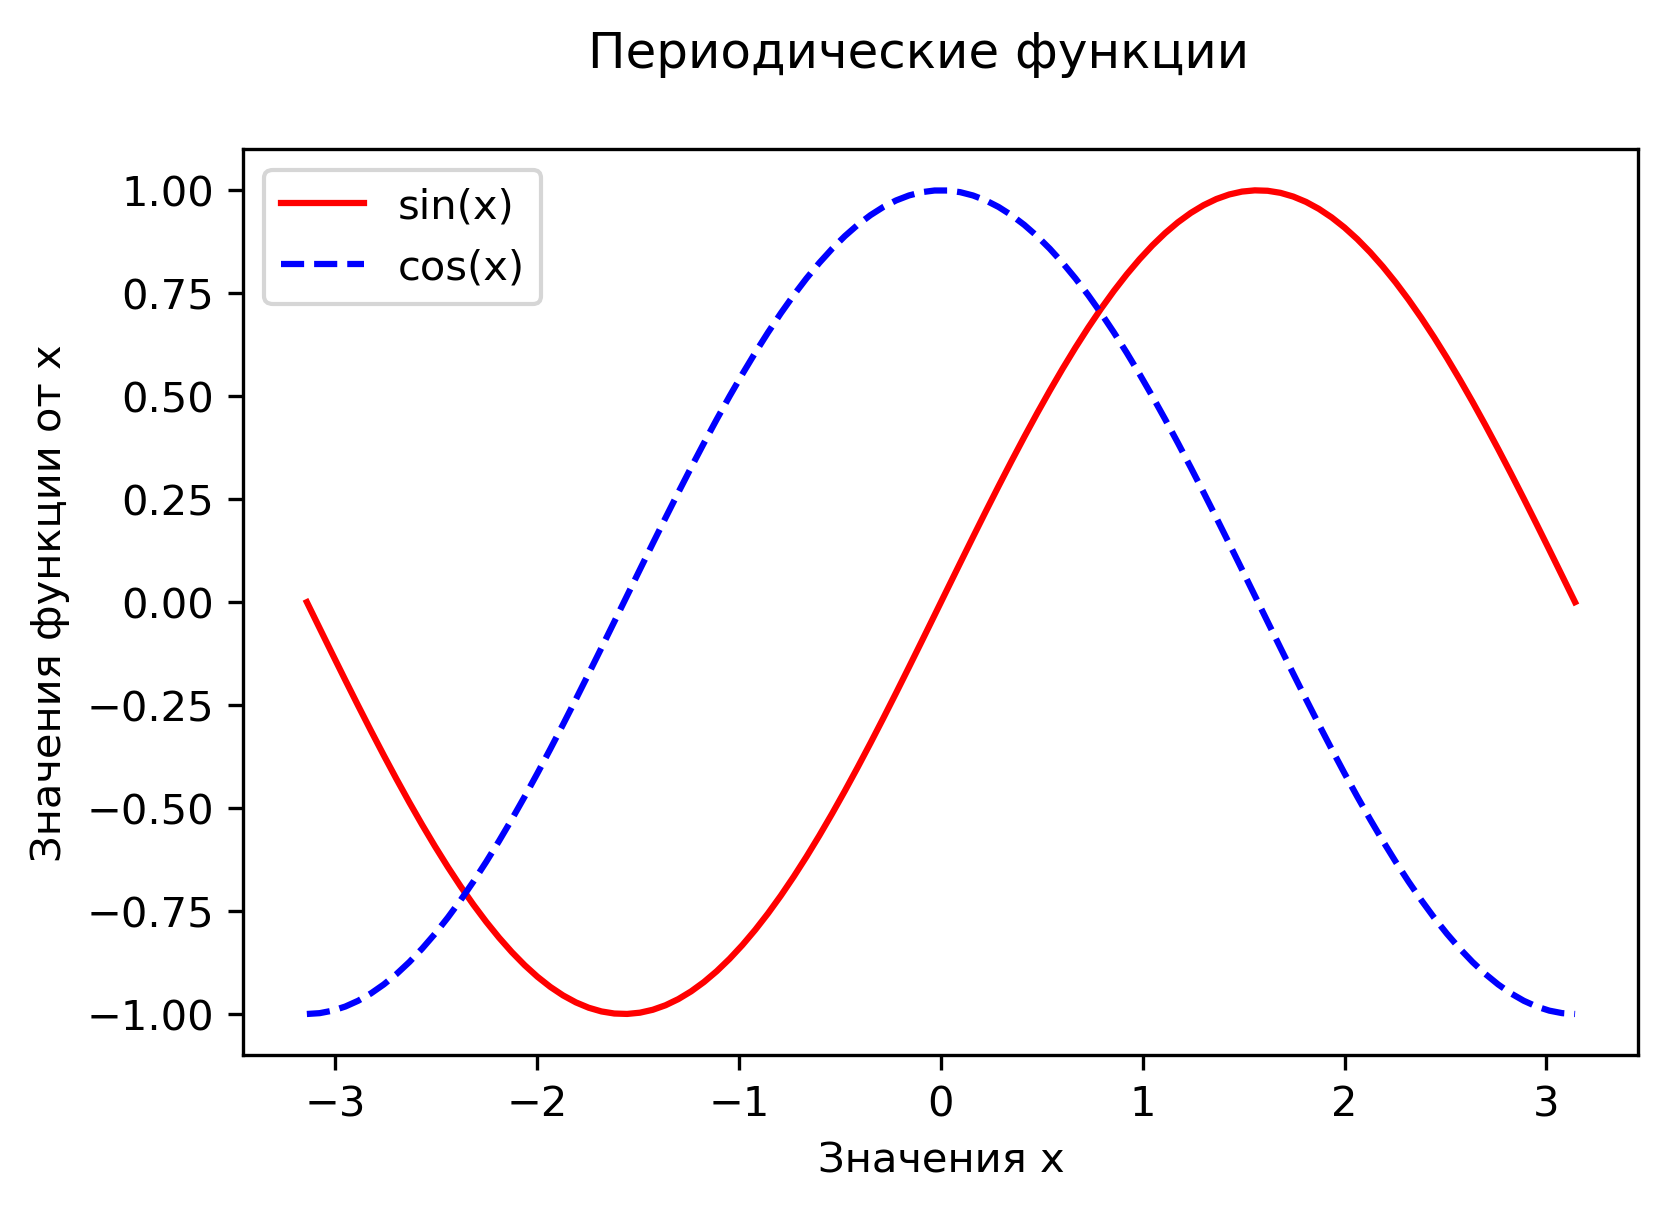

In [8]:
sin = lambda x: np.sin(x) # функция синуса
cos = lambda x: np.cos(x) # функция синуса
x = np.linspace(-np.pi, np.pi, 100) # множество значений x

figure = plt.figure(dpi=300) # создаём фигуру в которой будут графики
ax = figure.add_subplot() # добавляем в фигуру график
ax.plot(x, sin(x), color='red', label='sin(x)') # рисуем на графике функцию
ax.plot(x, cos(x), color='blue', linestyle='--', label='cos(x)')

ax.legend() # показываем легенду
figure.suptitle('Периодические функции') # устанвливаем подпись к фигуре
ax.set_xlabel('Значения x') # устанавливаем название оси x
ax.set_ylabel('Значения функции от x') # устанавливаем название оси y

plt.show()
# вывод очевиден 

### Задание 7

Рассмотреть сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Построить зеркальные горизонтальные гистограммы.

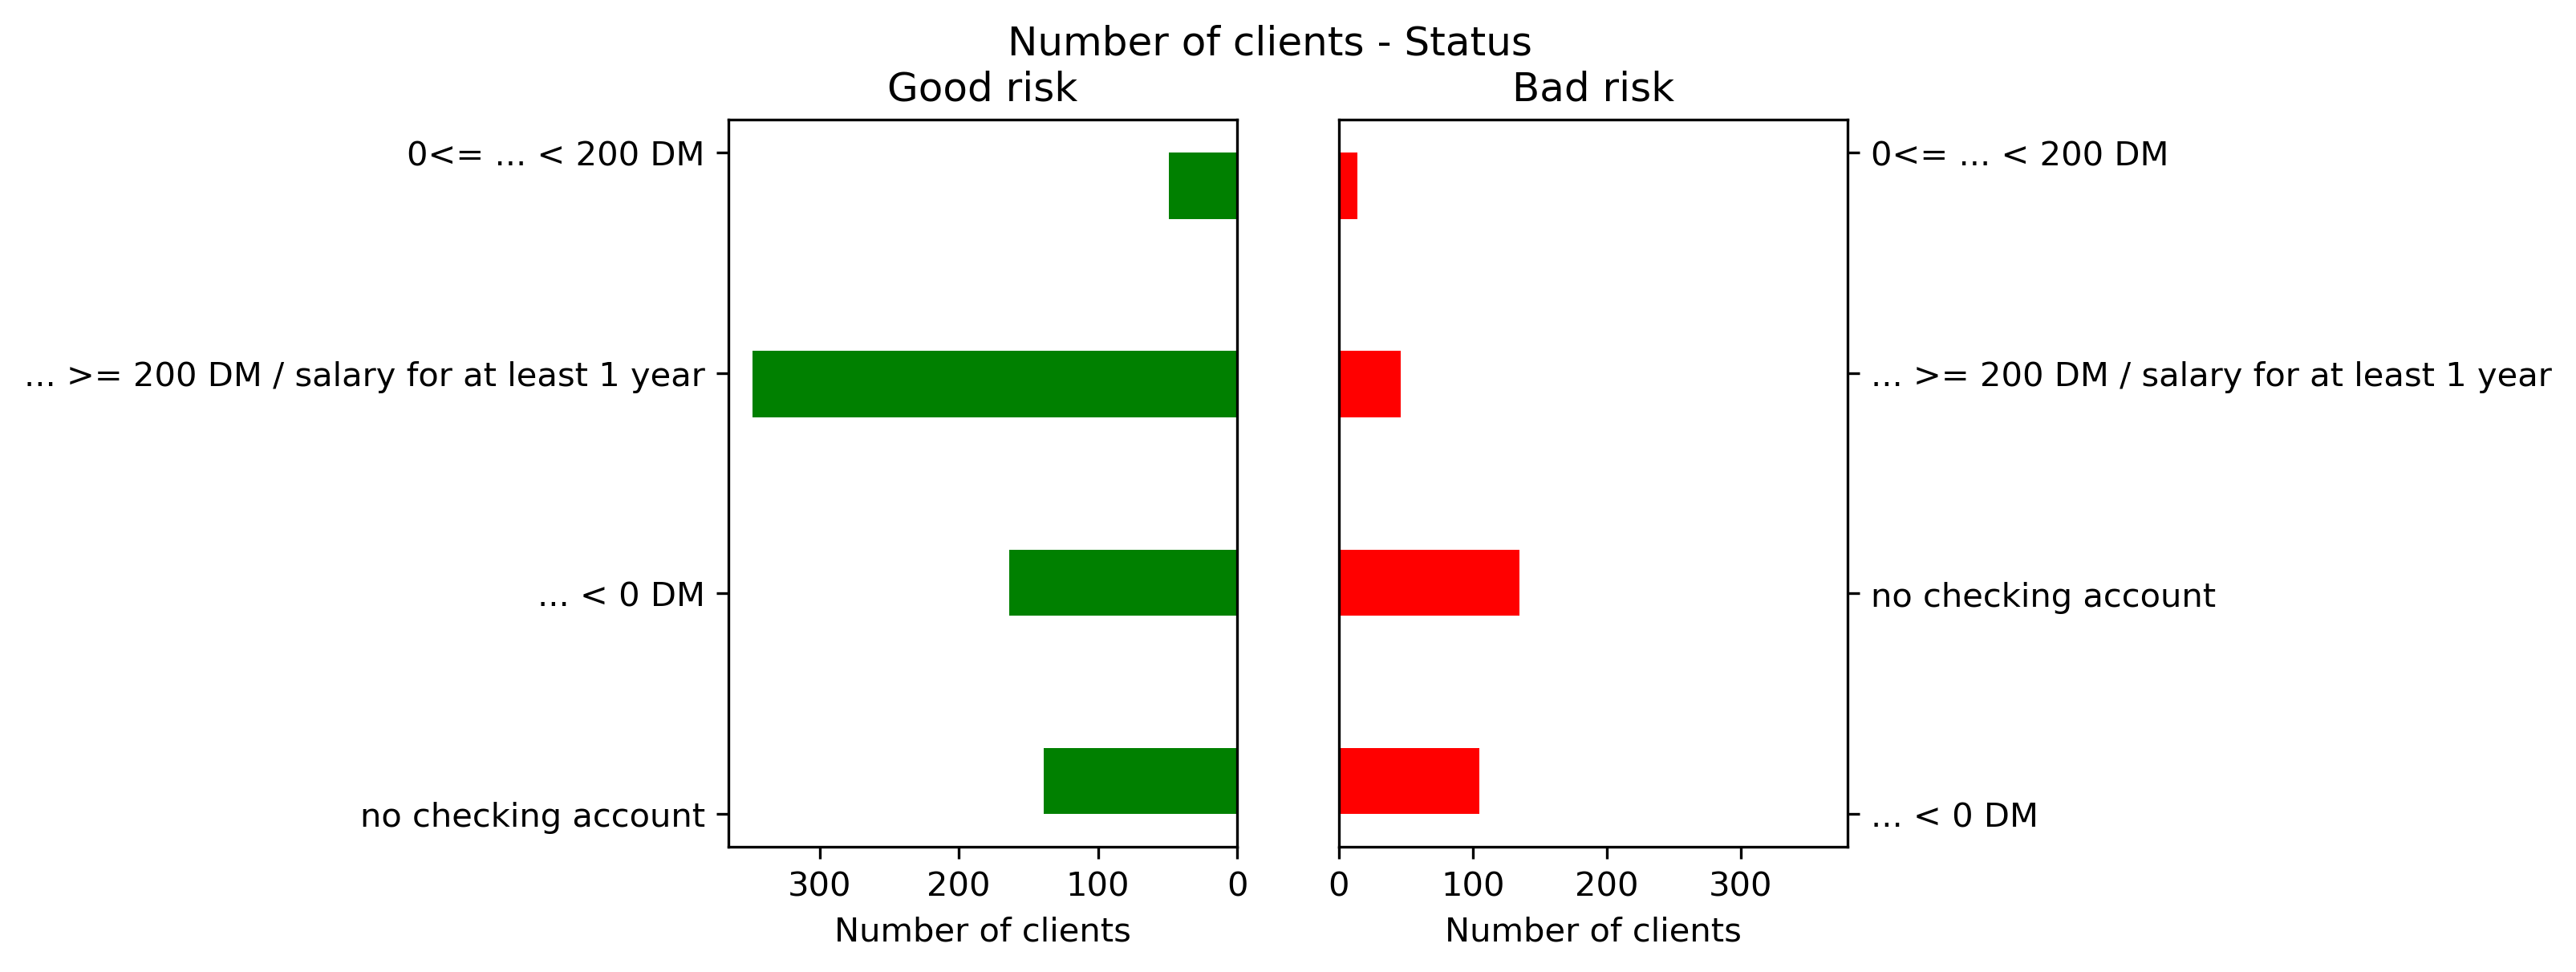

In [9]:
good_risk = data[data.credit_risk == 'good'] # датасет клиентов с хорошим кредитным риском
bad_risk = data[data.credit_risk == 'bad'] # датасет с плохим кредитным риском

fig, ax = plt.subplots(1, 2, dpi=300) # делаем фигуру с двумя графиками в строчку

ax[0].hist(good_risk.status, 
           orientation='horizontal', 
           color='g') # рисуем гистограмму на первом графике в строке
ax[0].set_title('Good risk') # устанавливаем название графика
ax[0].invert_xaxis() # инвертируем ось x
ax[0].set_xlabel('Number of clients')

ax[1].hist(bad_risk.status, 
           orientation='horizontal', 
           color='r') # рисуем гистограмму на втором графике в строке
ax[1].set_title('Bad risk')
ax[1].tick_params(left=False, right=True, labelleft=False, labelright=True) # устанавливаем параметры меток
ax[1].set_xlabel('Number of clients')
ax[1].set_xlim(left=0, right=380) # устанавливаем лимит значений по оси x

fig.suptitle('Number of clients - Status')

plt.show()
# можно заметить, что чаще клиенты с плохим крединтым риском не имеют расчётного счёта
# а у клиентов с хорошим кредитным риском чаще больше 200 немецких марок на расчётном счету
# ну и в целом люди с плохим кредитным риском встречаются реже



### Задание 8

In [10]:
import seaborn as sns

Построить гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ лучше с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

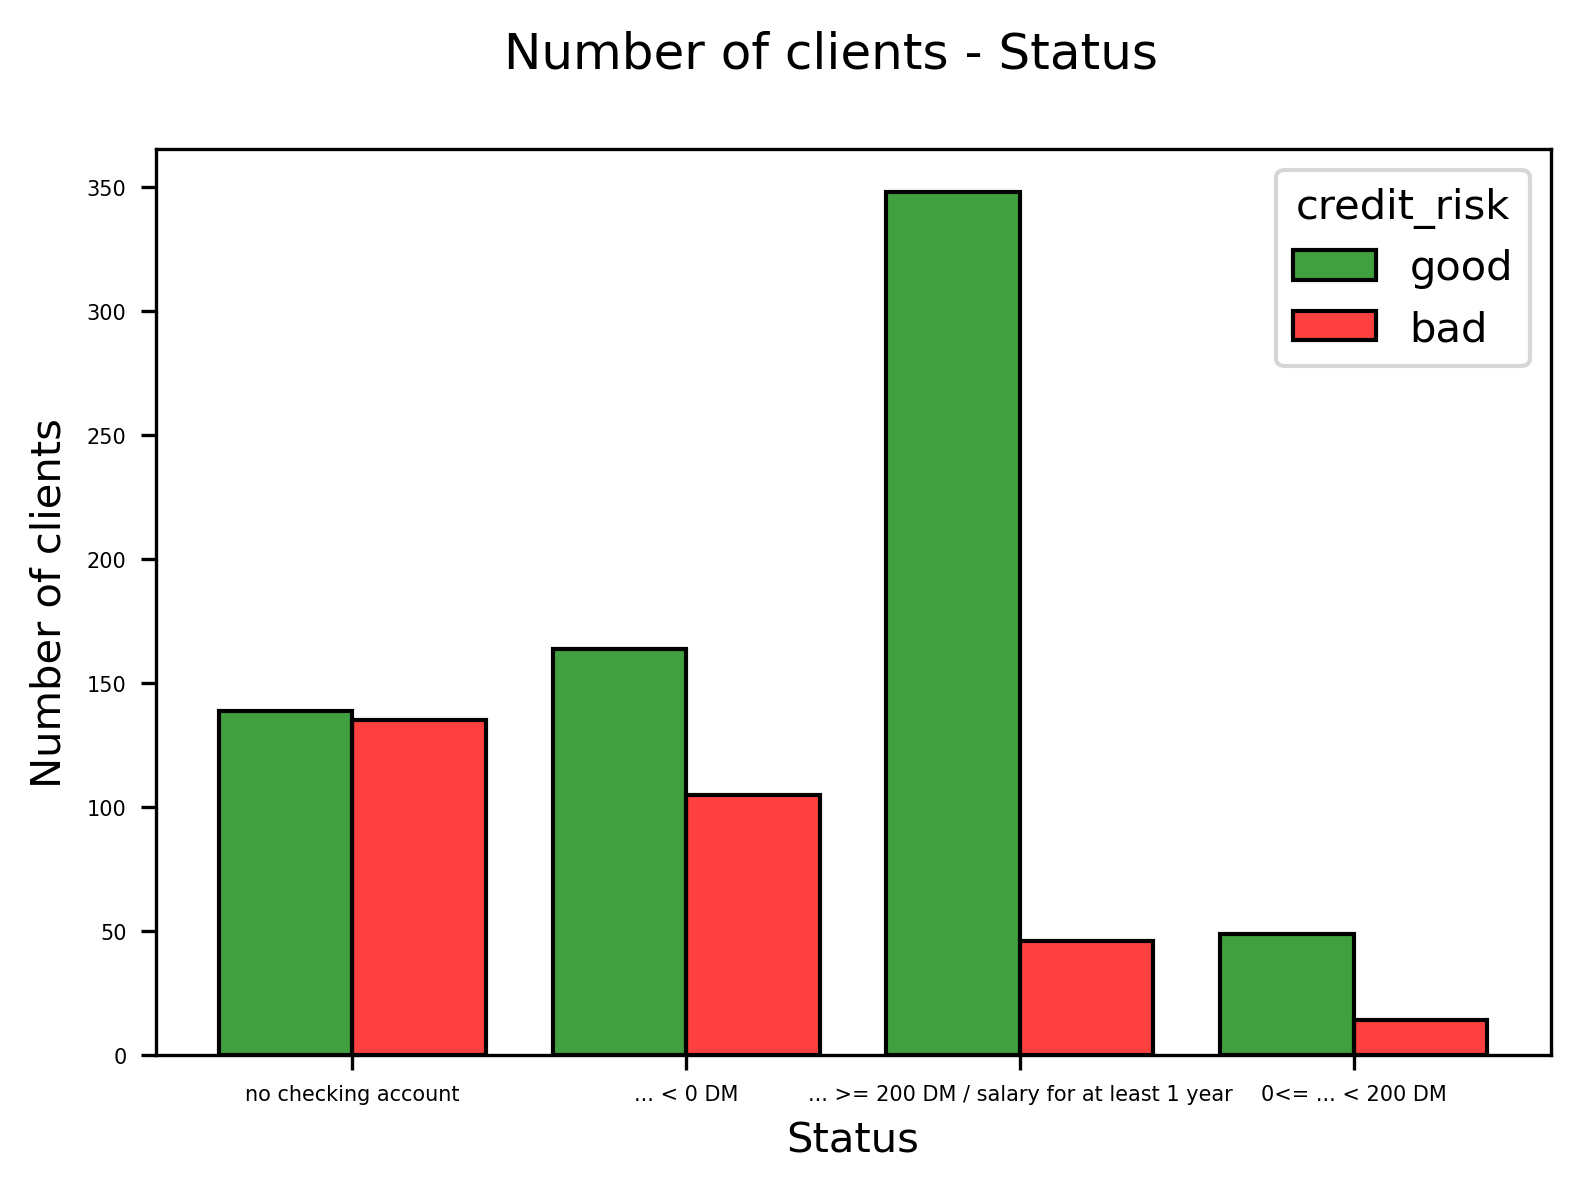

In [12]:
fig = plt.figure(dpi=300)
ax = sns.histplot(data=data, 
                  x='status', 
                  hue='credit_risk', 
                  multiple='dodge', 
                  shrink=0.8, 
                  palette=('g', 'r')) # рисуем гистограмму

ax.set_xlabel('Status')
ax.set_ylabel('Number of clients')
ax.tick_params(labelsize=5)
fig.suptitle('Number of clients - Status')

plt.show()
# очевидно, что код пишется легче с seaborn 
# на мой взгляд, график с помощью seaborn, воспринимается тоже лучше

### Задание 9

Для каждого размера сберегательного счёта оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту. Построить подходящую визуализацию.

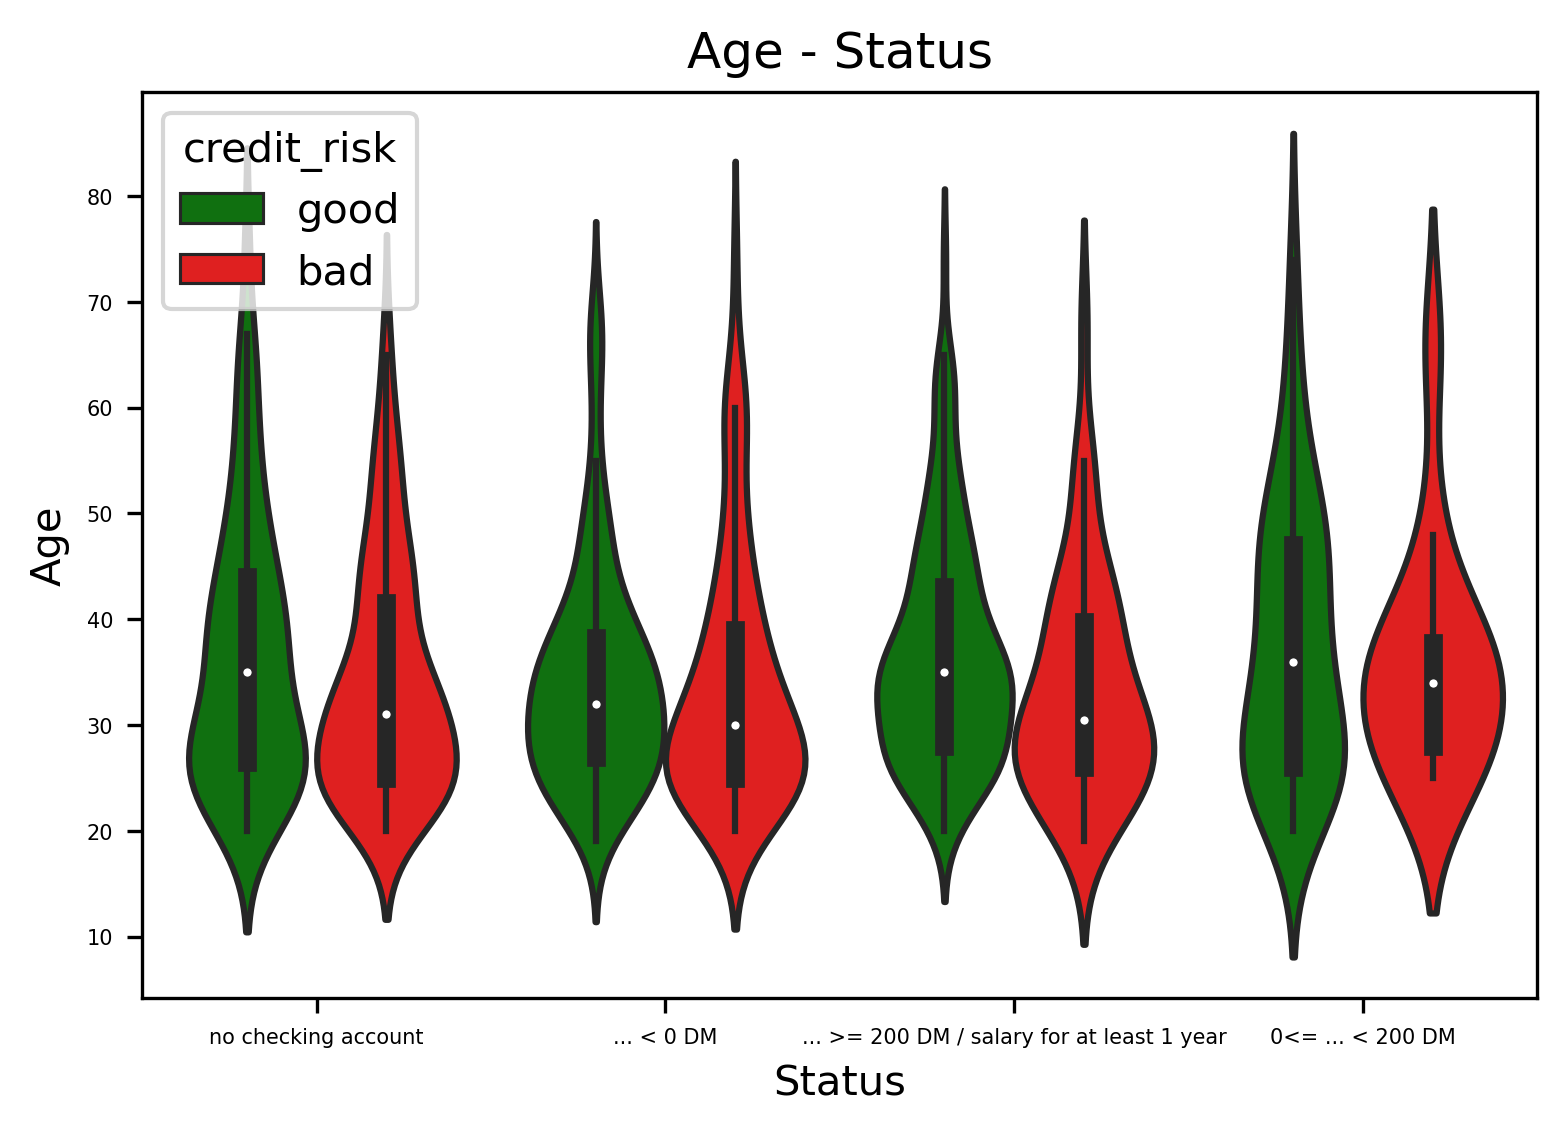

In [13]:
fig = plt.figure(dpi=300)
ax = sns.violinplot(data=data, 
                    x='status', 
                    y='age', 
                    hue='credit_risk', 
                    palette=('g', 'r')) # рисукм скрипичный график

ax.set_xlabel('Status')
ax.set_ylabel('Age')
ax.tick_params(labelsize=5)
ax.set_title('Age - Status')

plt.show()
# видно, что распределения очень похожи, но в среднем по группам, чуть более молодые люди имеют плохой кредитный риск, больше никаких выводов в голову не приходит

### Задание 10

Построить на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом.

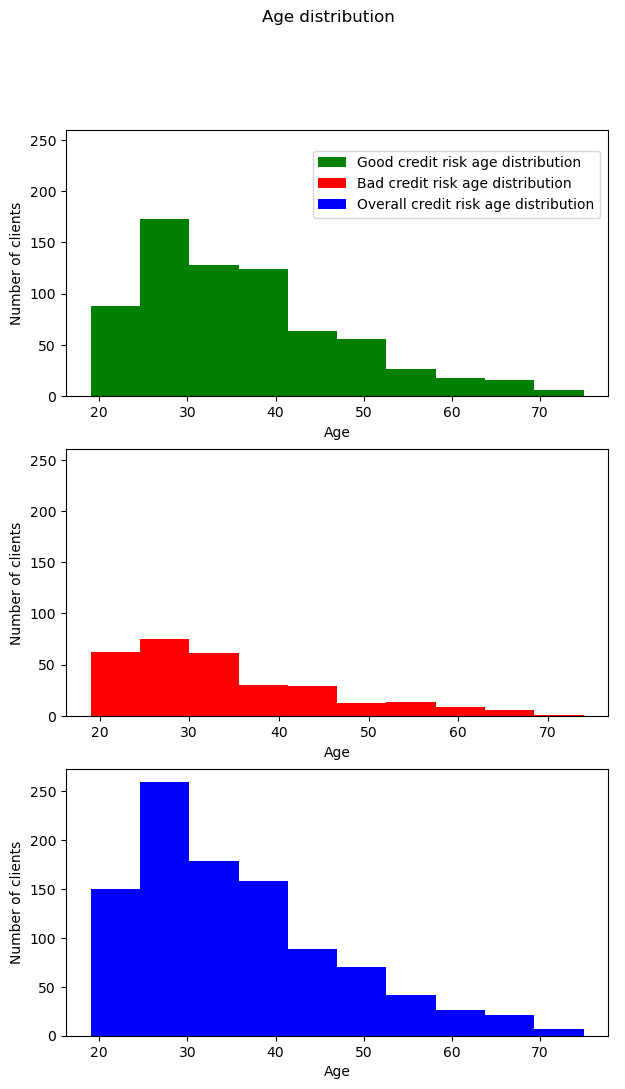

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(7, 12), dpi=100) # делаем фигуру с тремя графиками в столбец

ax[0].hist(good_risk.age, color='g', label='Good credit risk age distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of clients')
ax[0].set_ylim(bottom=0, top=260)

ax[1].hist(bad_risk.age, color='r', label='Bad credit risk age distribution')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of clients')
ax[1].set_ylim(bottom=0, top=260)

ax[2].hist(data.age, color='b', label='Overall credit risk age distribution')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Number of clients')

fig.legend(loc=(0.5, 0.8)) # устанавливаем положение легенды
fig.suptitle('Age distribution')

plt.show()

# с плохим кредитным риском людей меньше
# в основном клиентам от 18 до 52 лет
# как и у клиентов с хорошим кредитным риском, у клиентов с плохим кредитным риском, возраст чаще всего от 25 до 30 лет

### Задание 11

Построить диаграмму рассеяния с продолжительностью и размерами кредитов в качестве осей. Обозначить положительные и отрицательные кейсы разными цветами.

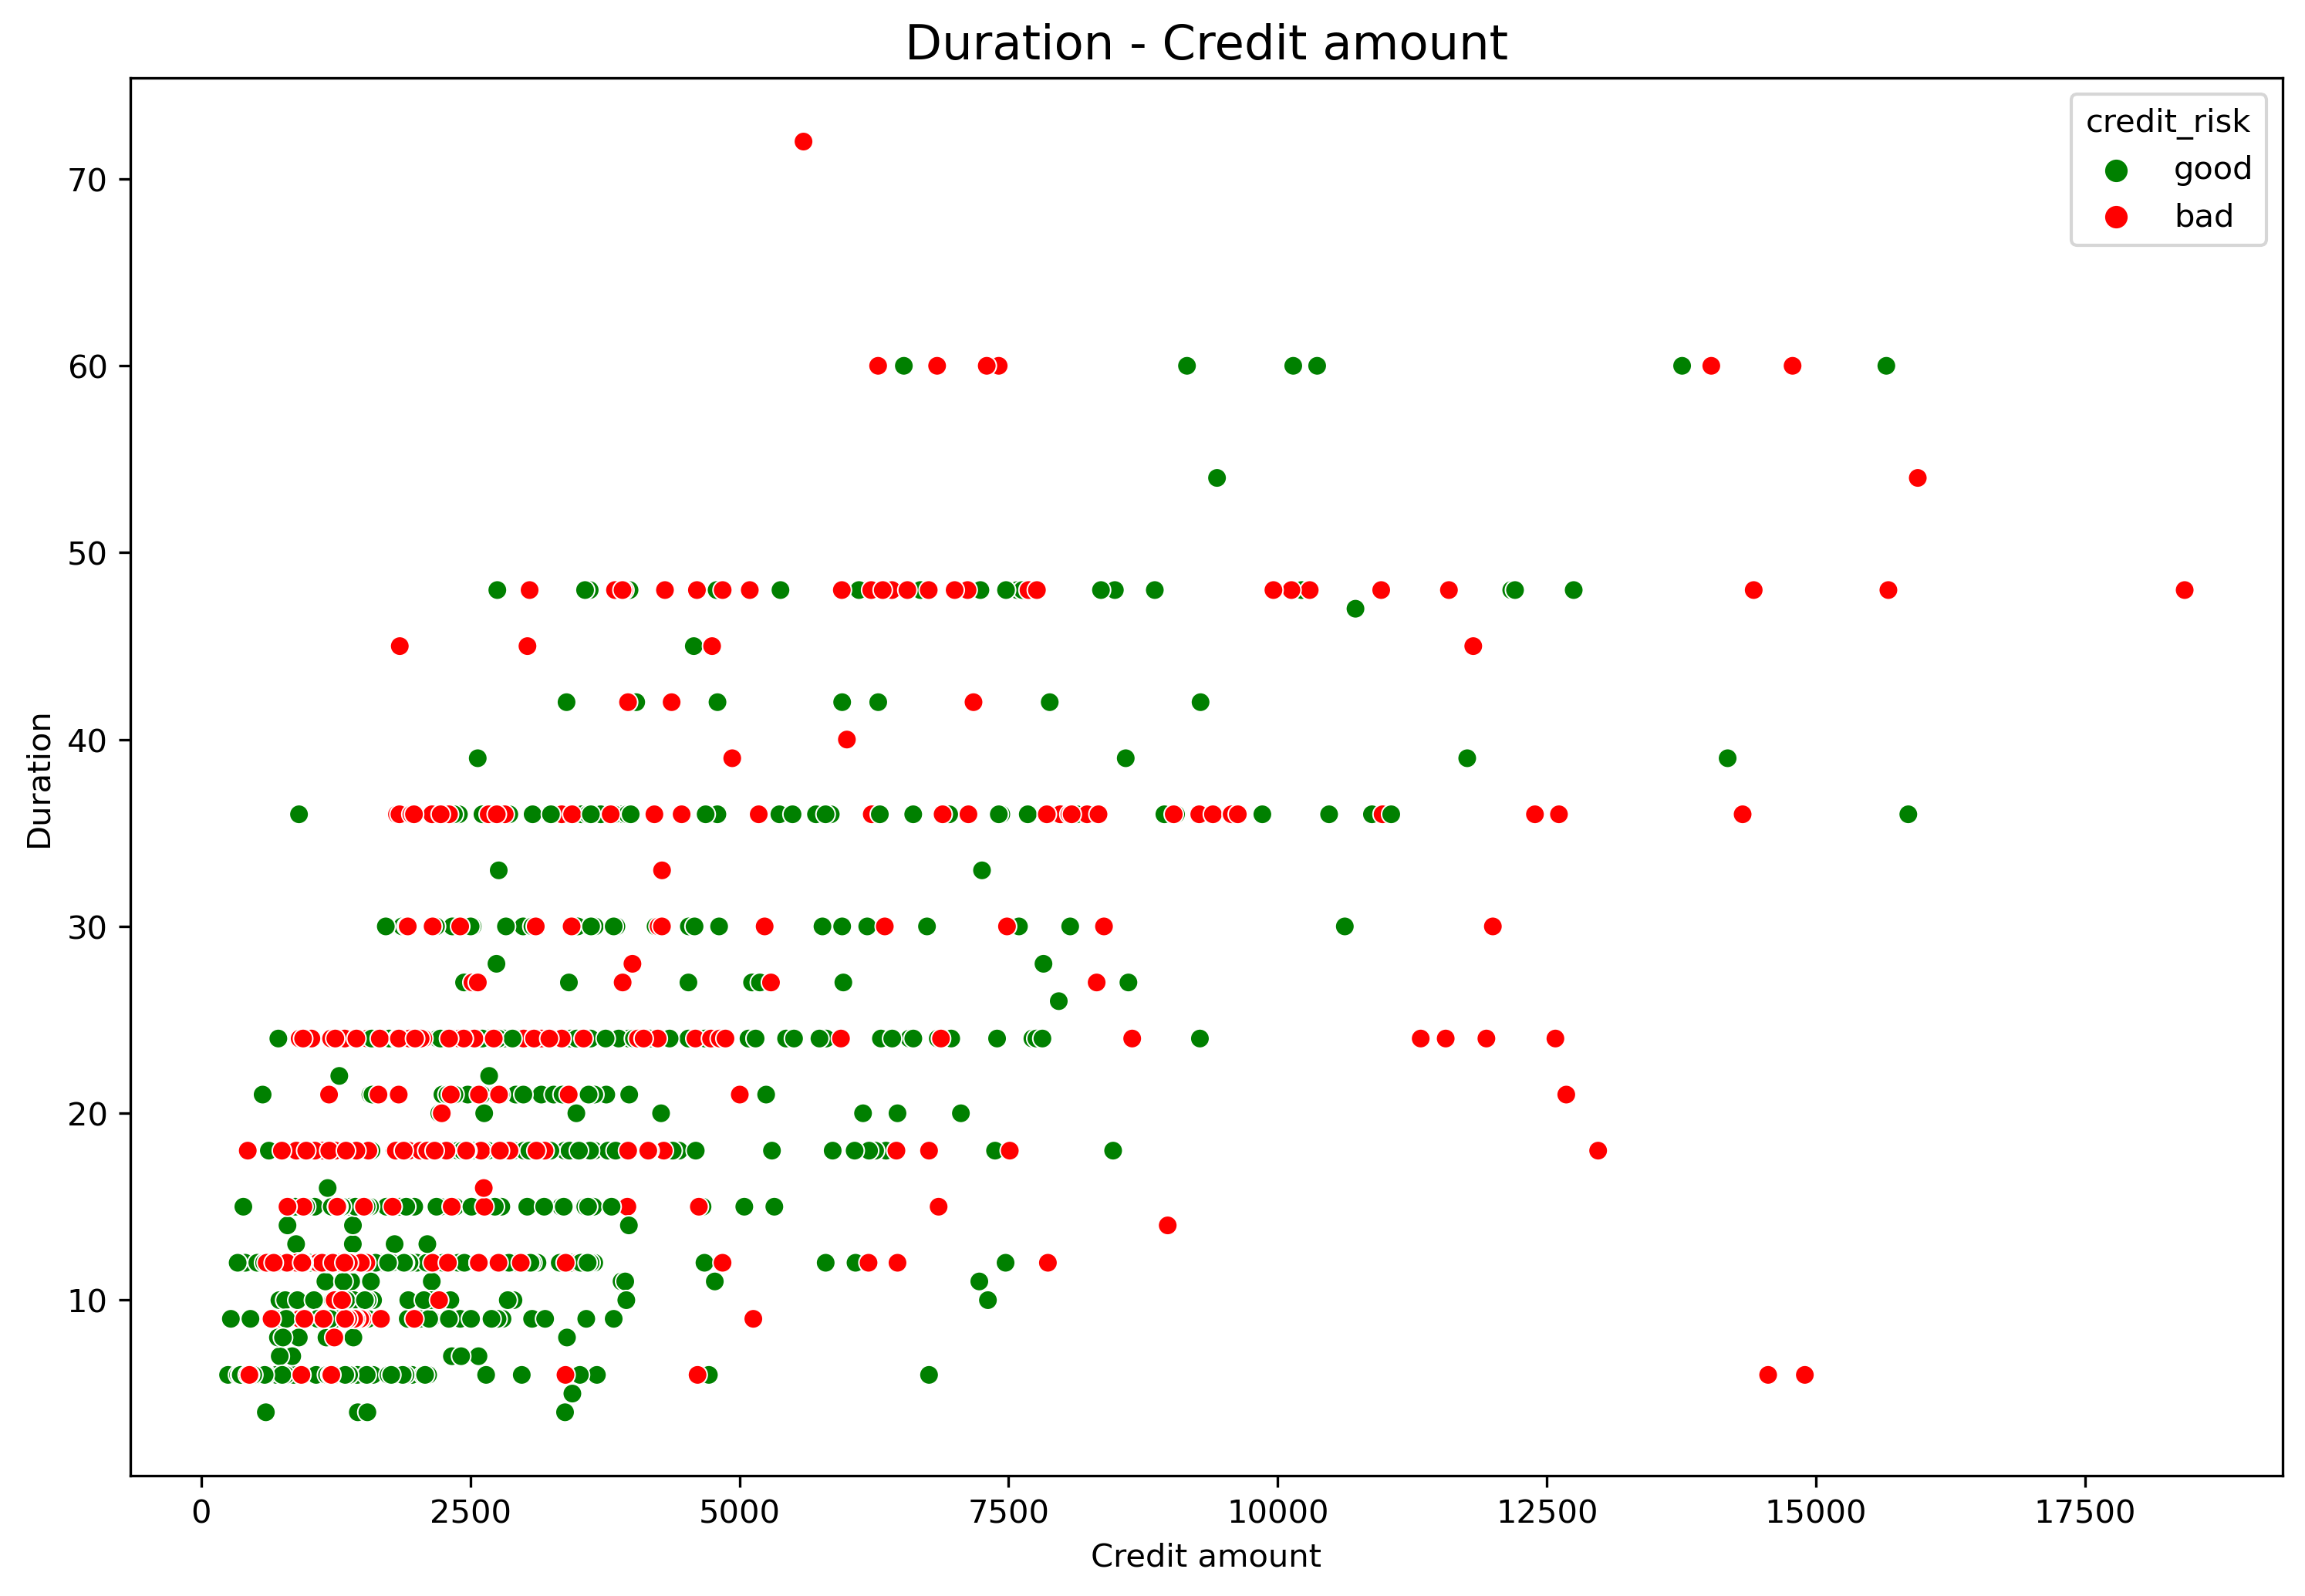

In [15]:
fig = plt.figure(figsize=(12, 8), dpi=300)
ax = sns.scatterplot(data=data, 
                     x='amount', 
                     y='duration', 
                     hue='credit_risk', 
                     palette=('g', 'r')) # делаем диаграмму рассеяния

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_title('Duration - Credit amount', fontsize=15)

plt.show()
# в основном берутся кредиты до 8 тысяч длительностью 48 месяцев
# между суммой кредита и длительностью есть слабая положительная корреляция, так как облако точек довольно разряженное
# в основном большие суммы кредитов имеют плохой кредитный риск

### Задание 12

Построить 3D версию диаграммы рассеяния, добавив ось с возрастом.

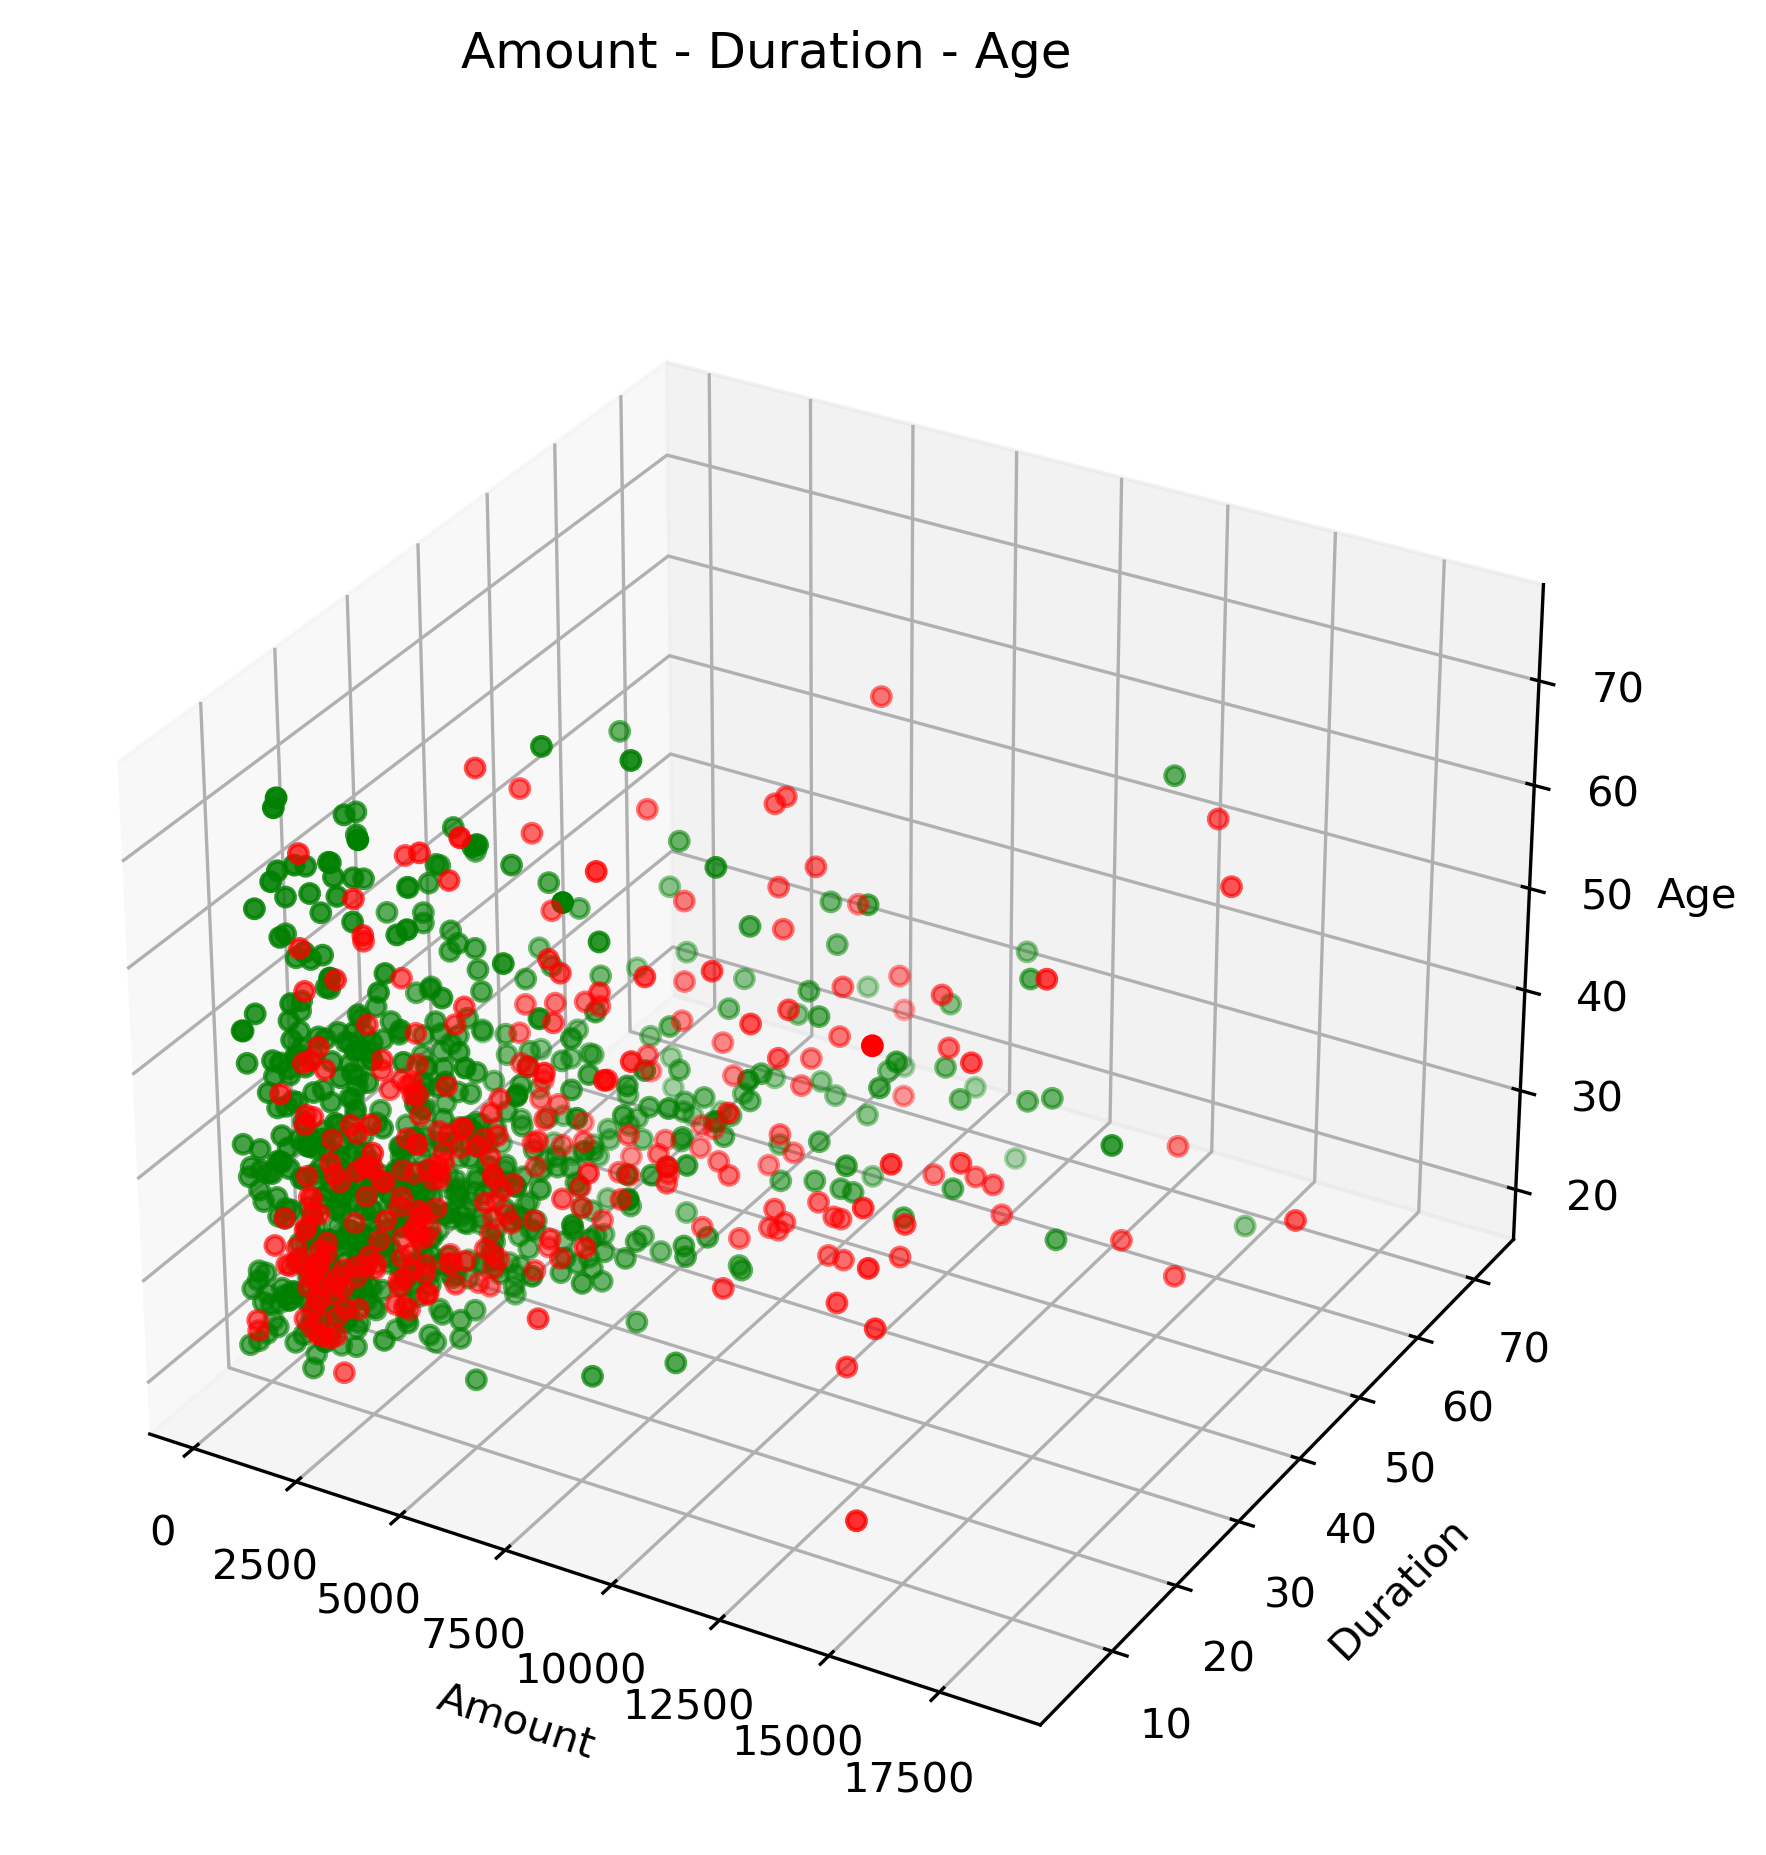

In [16]:
fig = plt.figure(figsize=(15, 7), dpi=300)
ax = fig.add_subplot(projection='3d') # делаем трёхмерный график
ax.scatter(good_risk.amount, good_risk.duration, good_risk.age, color='g')
ax.scatter(bad_risk.amount, bad_risk.duration, bad_risk.age, color='r')

fig.suptitle('Amount - Duration - Age')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()
# трёхмерные графики тяжело интерпретировать

### Задание 13

Представить все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавиться от категориальных признаков.

In [17]:
# your code here
data = data.drop(columns=['credit_history', 
                   'purpose', 
                   'personal_status_sex', 
                   'other_debtors', 'property', 
                   'other_installment_plans', 
                   'housing', 
                   'job']) # избавляемся от категориальных признаков

for column in data.columns: # смотрим на уникальные значения каждого обжекта
    if data[column].dtype == 'object': 
        print(column, ':', data[column].unique())

# задаём как будем кодировать порядковые признаки и бинарные признаки
mapper = {'status': {'... < 0 DM': 0, 
                     'no checking account': 1, 
                     '0<= ... < 200 DM': 2, 
                     '... >= 200 DM / salary for at least 1 year': 3},
          'savings': {'unknown/no savings account': 0, 
                      '... <  100 DM': 1, 
                      '100 <= ... <  500 DM': 2, 
                      '500 <= ... < 1000 DM': 3, 
                      '... >= 1000 DM': 4}, 
          'employment_duration': {'unemployed': 0, 
                                  '< 1 yr': 1, 
                                  '1 <= ... < 4 yrs': 2, 
                                  '4 <= ... < 7 yrs': 3, 
                                  '>= 7 yrs': 4},
          'installment_rate': {'< 20': 0, 
                               '20 <= ... < 25': 1, 
                               '25 <= ... < 35': 2, 
                               '>= 35': 3},
          'present_residence': {'< 1 yr': 0, 
                                '1 <= ... < 4 yrs': 1, 
                                '4 <= ... < 7 yrs': 2, 
                                '>= 7 yrs': 3}, 
          'number_credits': {'1': 0, 
                             '2-3': 1, 
                             '4-5': 2, 
                             '>= 6': 3},
          'people_liable': {'0 to 2': 0, '3 or more': 1},
          'telephone': {'no': 0, 'yes (under customer name)': 1},
          'foreign_worker': {'no': 0, 'yes': 1},
          'credit_risk': {'bad': 0, 'good': 1}
         }

data.replace(mapper, inplace=True) # заменяем значения в датасете
data.head()


status : ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
savings : ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']
employment_duration : ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']
installment_rate : ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']
present_residence : ['>= 7 yrs' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' '< 1 yr']
number_credits : ['1' '2-3' '4-5' '>= 6']
people_liable : ['0 to 2' '3 or more']
telephone : ['no' 'yes (under customer name)']
foreign_worker : ['no' 'yes']
credit_risk : ['good' 'bad']


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,1,18,1049,0,1,0,3,21,0,0,0,0,1
1,1,9,2799,0,2,2,1,36,1,1,0,0,1
2,0,12,841,1,3,2,3,23,0,0,0,0,1
3,1,12,2122,0,2,1,1,39,1,1,0,1,1
4,1,12,2171,0,2,0,3,38,1,0,0,1,1


### Задание 14

По результатам предыдущего задания должна получилась таблица, в которой все признаки так или иначе представлены числовыми значениями. Требуется придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, можно просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу.

In [18]:
def predict(Xtest: np.array) -> np.array:
    Xtest = np.matrix(Xtest)
    status = (Xtest[:, 0] >= 2) # у клиента есть марки на расчётном счету
    duration = (Xtest[:, 1] <= 35) # длительность кредита меньше 35 месяцев
    amount = (Xtest[:, 2] <= 11000) # сумма кредита меньше 11000
    savings = (Xtest[:, 3] >= 2) # сбережинй больше 100 марок
    age = (Xtest[:, 3] <= 35) # возраст клиента меньше 35
    y = (status | duration & amount & age | savings).astype('int64')
    return y

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

# проверил при разных test_syze и random_state, accuracy везде больше 0.6


/var/folders/9f/vkkcjgls68b0pxjhdw4_rhwm0000gn/T/ipykernel_16504/4186797799.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.716